# Support Vector Machines

Finding decision boundary between classes using large margin classification.

$$J(\Theta) = C \sum_{i=0}^{m}[ { y^{(i)} cost_1(\Theta^T f^{(i)}) \
                       + (1 - y^{(i)}) cost_0(\Theta^T f^{(i)}) }] + \frac{1}{2} \sum_{i = 0}^{n} \theta^2_i$$ 
                      
$$y^{(i)} =
  \begin{cases}
    1       & \quad \Theta^T f^{(i)} \ge 1 \\
    0  & \quad \Theta^T f^{(i)} \le -1
  \end{cases}$$
                       
Where $f^{(i)}$ is a similarity function $K(x^{(i)}, x^{(j)})$ between input $x^{(i)}$ and $x^{(j)}$. 
Similarity function is defined by the kernel.

$m$ - number of training examples, $n$ - number of features.

## Kernel Trick

It's possible to map input feature vector $x \in R^p$ to higher dimensions $\phi (x) \in R^d$ using kernel trick by defining dot product $\langle \phi (x^{(i)}), \phi (x^{(j)}) \rangle$ in dimension $R^d$.

Since $\langle \phi (x^{(i)}), \phi (x^{(j)}) \rangle = p^{(i)} || x^{(j)} ||$ - projection of vector $x^{(i)}$ to $x^{(j)}$, kernel function also defines similarity between two vectors.

## Linear Kernel

The problem is simillar to logistic regression.

$$K(x^{(i)}, x^{(j)}) = (x^{(i)})^T x^{(j)}$$

In [1]:
# import libs
import sys
sys.path.append("../")

import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from sklearn import svm
import math
from logistic_regression import *
from scipy import optimize
from spam_svm import *

In [2]:
# load data
data1 = scipy.io.loadmat('../data/ex6data1.mat')

x1 = data1['X']
y1 = data1['y']

print("x", x1.shape, "y", y1.shape)

x (51, 2) y (51, 1)


Regularization parameter $C$ has the same effect as $\frac{1}{\lambda}$ in logistic regression.

In [33]:
# learn SVM parameters
def fit_svm(x, y, kernel, C=1, gamma=1, probability=False):
    clf = svm.SVC(C=C, gamma=gamma, max_iter=max(C, 1)*10000, 
                  kernel=kernel, probability = probability)
    clf.fit(x, y.ravel())
    return clf


def fit_logistic_regression(x, y, C):
    x0 = np.concatenate([np.ones((x.shape[0], 1)), x], axis=1)

    return optimize.fmin_bfgs(regularized_cost_function, 
                              np.zeros(x0.shape[1]), 
                              regularized_cost_function_derivative, 
                              args=(x0, y, 1 / C),
                              disp=False)

In [4]:
# plot data
def plot_data():
    positive = x1[(y1 == 1).T[0],:]
    negative = x1[(y1 == 0).T[0],:]

    plt.scatter(positive[:,0], positive[:,1], marker="+")
    plt.scatter(negative[:,0], negative[:,1], marker=".")
    plt.xlabel("x1")
    plt.ylabel("x2")
    

def plot_svm_decision_boundary(clf):
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'],
               colors=['grey', 'red', 'grey'])
    

def plot_logistic_regression_boundary(coefficients):
    ax = plt.gca()
    xx = ax.get_xlim()
    yy = [- (coefficients[0] + coefficients[1] * x) / coefficients[2] for x in xx]
    plt.plot(xx, yy, "-.b", alpha=0.5)

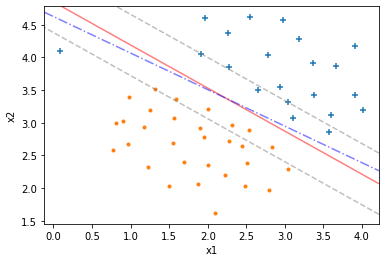

In [5]:
# C = 1
plot_data()
plot_svm_decision_boundary(fit_svm(x1, y1, "linear", C=1))
plot_logistic_regression_boundary(fit_logistic_regression(x1, y1, C=1))
plt.show()

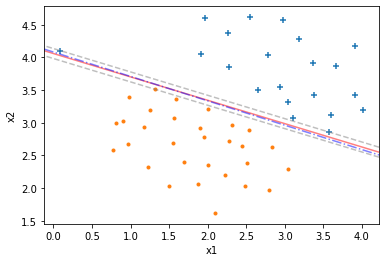

In [6]:
# C = 100
plot_data()
plot_svm_decision_boundary(fit_svm(x1, y1, "linear", C=100))
plot_logistic_regression_boundary(fit_logistic_regression(x1, y1, C=100))
plt.show()

## Gaussian Kernel

Finding non-linear decision boundaries:


$$K(x^{(i)}, x^{(j)}) = exp( - \frac{||x^{(i)} - x^{(j)}||^2}{2 \sigma^2 } )
    = exp( - \frac{ \sum^{n}_{k=0} (x_k^{(i)} - x_k^{(j)})^2}{2 \sigma^2 } )$$
    
$\sigma$ controls how fast similarity metric decreases when $x^{(i)}$ and $x^{(j)}$ go further apart.

In [7]:
#load data
data2 = scipy.io.loadmat('../data/ex6data2.mat')

x2 = data2['X']
y2 = data2['y']

print("x", x2.shape, "y", y2.shape)

x (863, 2) y (863, 1)


In [8]:
# plot data
def plot_data2():
    positive = x2[(y2 == 1).T[0],:]
    negative = x2[(y2 == 0).T[0],:]

    plt.scatter(positive[:,0], positive[:,1], marker="+")
    plt.scatter(negative[:,0], negative[:,1], marker=".")
    plt.xlabel("x1")
    plt.ylabel("x2")
    

$$\gamma = \frac{1}{(2 \sigma^2)}$$

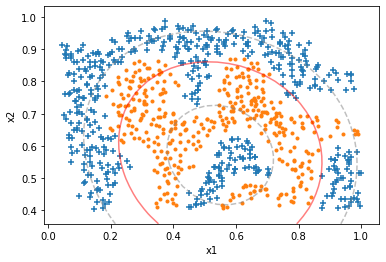

In [9]:
# gamma = 0.5 (sigma = 1)
plot_data2()
plot_svm_decision_boundary(fit_svm(x2, y2, "rbf", C=1, gamma=1))
plt.show()

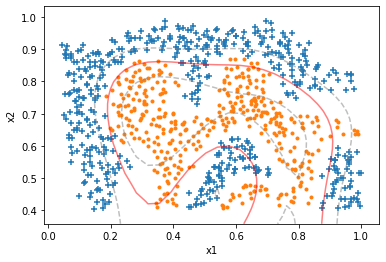

In [10]:
# gamma = 10 (sigma = 0.22)
plot_data2()
plot_svm_decision_boundary(fit_svm(x2, y2, "rbf", C=1, gamma=10))
plt.show()

### Find Optimal Parameters

Using cross validation set to find optimal $C$ and $\sigma$.

In [11]:
# load data
data3 = scipy.io.loadmat('../data/ex6data3.mat')

x3 = data3["X"]
y3 = data3["y"]

x3_cv = data3["Xval"]
y3_cv = data3["yval"]

print("x", x3.shape, "y", y3.shape)
print("x_cv", x3_cv.shape, "y_cv", y3_cv.shape)

x (211, 2) y (211, 1)
x_cv (200, 2) y_cv (200, 1)


In [12]:
# find optimal parameters 
def find_optimal_svm_parameters():
    c_values = np.array([(0.01 * math.pow(10, i), 0.05 * math.pow(10, i)) for i in range(4)]).ravel()
    gamma_values = np.copy(c_values)

    best_prediction = 0
    optimal_c = c_values[0]
    optimal_gamma = c_values[0]

    for c in c_values:
        for gamma in gamma_values:
            prediction = np.sum(fit_svm(x3, y3, "rbf", C=c, gamma=gamma)
                                .predict(x3_cv)
                                .reshape(x3_cv.shape[0], 1) == y3_cv)
            if (prediction > best_prediction):
                best_prediction = prediction
                optimal_c = c
                optimal_gamma = gamma
                
    return (optimal_c, optimal_gamma)


optimal_c, optimal_gamma = find_optimal_svm_parameters()
print("C", optimal_c, "gamma", optimal_gamma)

C 1.0 gamma 50.0


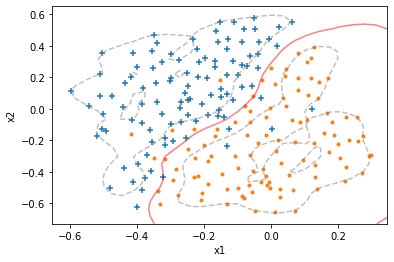

In [13]:
# plot data with optimal coefficients decision boundary
def plot_data3():
    positive = x3[(y3 == 1).T[0],:]
    negative = x3[(y3 == 0).T[0],:]

    plt.scatter(positive[:,0], positive[:,1], marker="+")
    plt.scatter(negative[:,0], negative[:,1], marker=".")
    plt.xlabel("x1")
    plt.ylabel("x2")
    
plot_data3()
plot_svm_decision_boundary(fit_svm(x3, y3, "rbf", C=optimal_c, gamma=optimal_gamma))
plt.show()

# Spam Classification

In [14]:
# load spam database
spam_train_data = scipy.io.loadmat('../data/spamTrain.mat')
x_spam = spam_train_data['X']
y_spam = spam_train_data['y']

print("train x", x_spam.shape, "y", y_spam.shape)

spam_test_data = scipy.io.loadmat('../data/spamTest.mat')
x_spam_test = spam_test_data['Xtest']
y_spam_test = spam_test_data['ytest']

print("test x", x_spam_test.shape, "y", y_spam_test.shape)

vocab = get_vocab_vector("../data/vocab.txt")

train x (4000, 1899) y (4000, 1)
test x (1000, 1899) y (1000, 1)


In [75]:
# train svm with spam database
clf = fit_svm(x_spam, y_spam, kernel="linear", C=0.1, probability=True)

In [76]:
# check training accuracy on the test set
np.sum(clf.predict(x_spam_test).reshape(x_spam_test.shape[0], 1) == y_spam_test) / y_spam_test.size * 100

98.9

Map email body to feature vector $x \in R^v$ where $v$ is a number of words in a spam vocabulary dictionary.

In [77]:
# check email samples
def check_email(email_path):
    body = process_email(email_path)
    p_false, p_true = clf.predict_proba(map_text_to_feature_vector(body, vocab))[0]
    print("not spam =", round(p_false, 2), "/ spam =", round(p_true, 2))
    

check_email("../data/spamSample1.txt")

not spam = 0.02 / spam = 0.98


In [78]:
check_email("../data/spamSample2.txt")

not spam = 0.2 / spam = 0.8


In [79]:
check_email("../data/emailSample1.txt")

not spam = 0.78 / spam = 0.22


In [80]:
check_email("../data/emailSample2.txt")

not spam = 1.0 / spam = 0.0
